In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\notebooks")

df = pd.read_csv("../eda_outputs/tables/parsed_annotations.csv")

In [3]:
df["x_center"] = (df["x1"] + df["x2"]) / 2 / 1280
df["y_center"] = (df["y1"] + df["y2"]) / 2 / 720

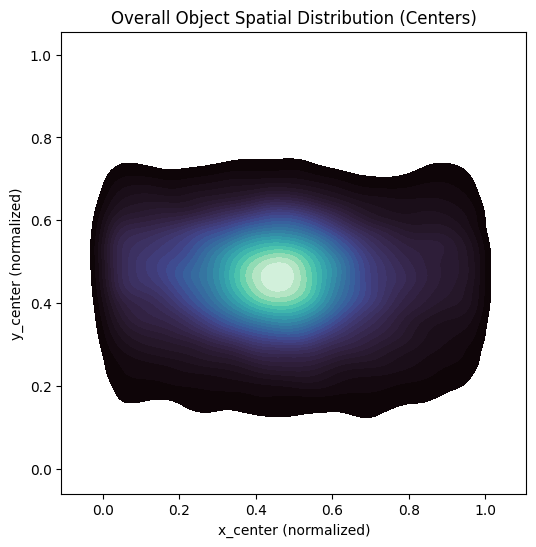

In [4]:
df_sample = df.sample(n=50000, random_state=42)

plt.figure(figsize=(6,6))
sns.kdeplot(
    x=df_sample["x_center"],
    y=df_sample["y_center"],
    fill=True,
    cmap="mako",
    levels=30
)
plt.title("Overall Object Spatial Distribution (Centers)")
plt.xlabel("x_center (normalized)")
plt.ylabel("y_center (normalized)")
plt.show()


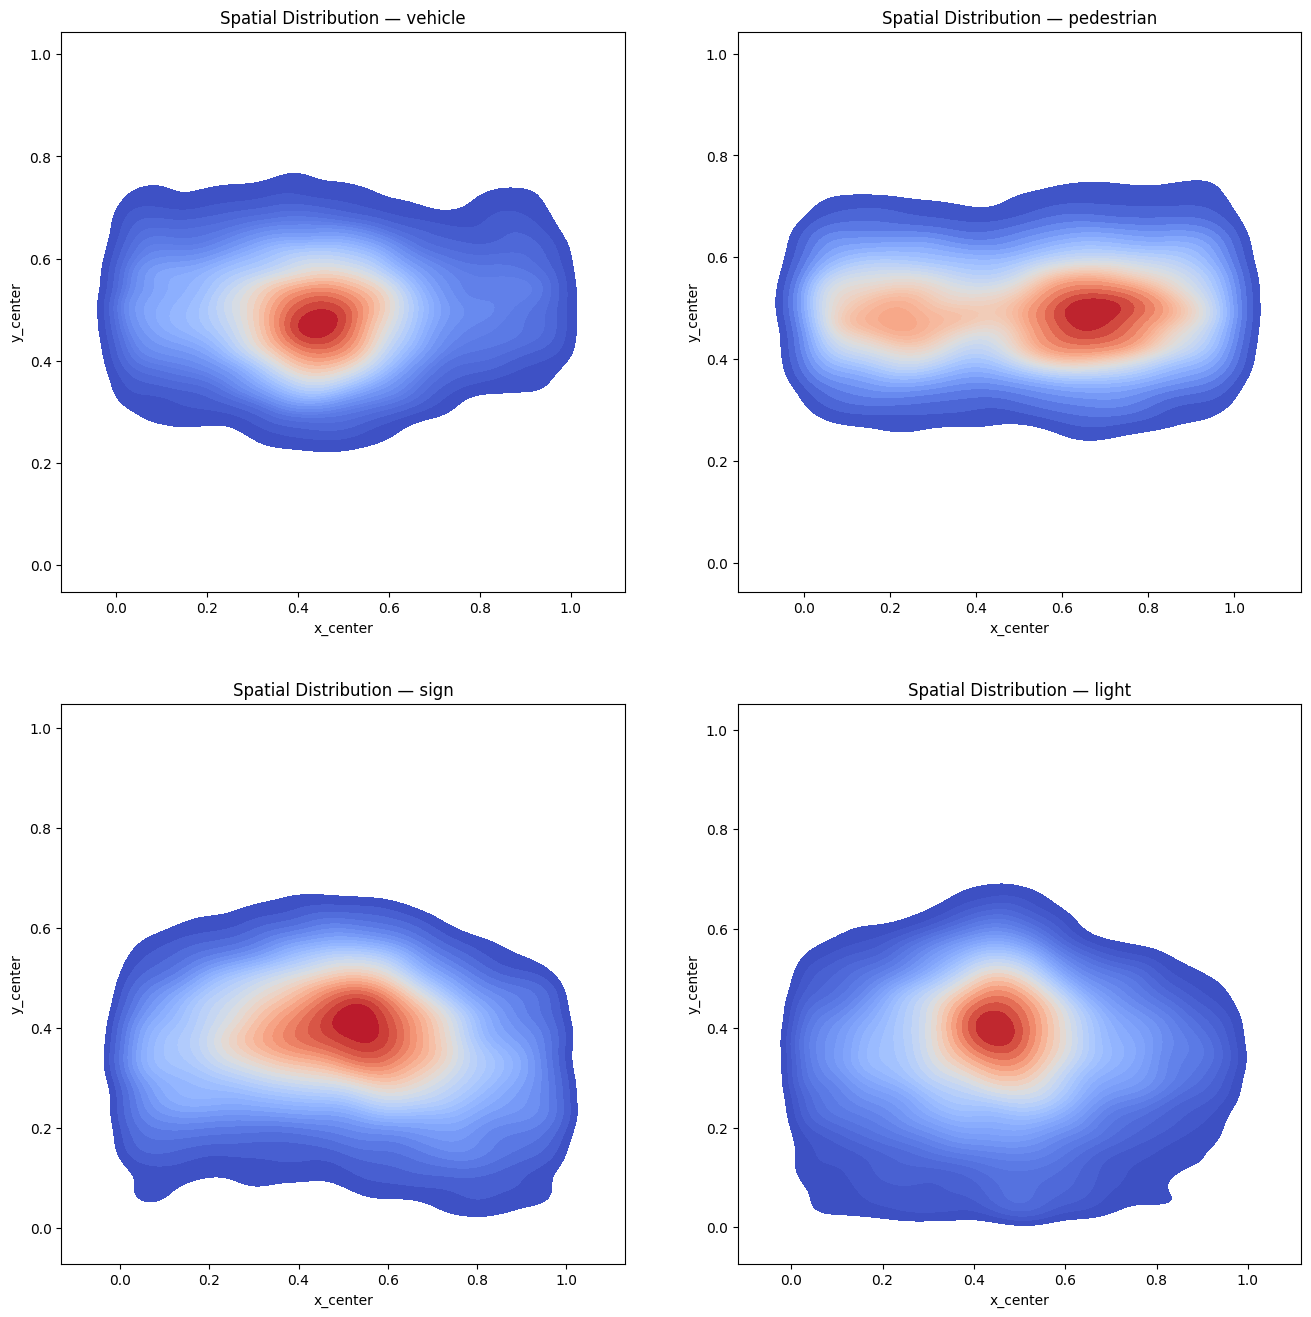

In [5]:
# class_groups = {
#     "vehicle": ["car", "truck", "bus"],
#     "pedestrian": ["person", "rider"],
#     "sign": ["traffic sign"],
#     "light": ["traffic light"]
# }

# for group_name, categories in class_groups.items():
#     subset = df[df["category"].isin(categories)].sample(n=20000, random_state=42)
    
#     plt.figure(figsize=(6,6))
#     sns.kdeplot(
#         x=subset["x_center"],
#         y=subset["y_center"],
#         fill=True,
#         cmap="coolwarm",
#         levels=30
#     )
#     plt.title(f"Spatial Distribution — {group_name}")
#     plt.xlabel("x_center")
#     plt.ylabel("y_center")
#     plt.show()

    
class_groups = {
    "vehicle": ["car", "truck", "bus"],
    "pedestrian": ["person", "rider"],
    "sign": ["traffic sign"],
    "light": ["traffic light"]
}

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
for group_name, categories in class_groups.items():
    subset  = df[df["category"].isin(categories)].sample(n=20000, random_state=42)
    
    if group_name == "vehicle":
        ax = axs[0, 0]
    elif group_name == "pedestrian":
        ax = axs[0, 1]
    elif group_name == "sign":
        ax = axs[1, 0]
    else: # group_name == "light"
        ax = axs[1, 1]
    
    sns.kdeplot(x=subset["x_center"], y=subset["y_center"], fill=True, cmap="coolwarm", levels=30, ax=ax)
    ax.set_title(f"Spatial Distribution — {group_name}")
    ax.set_xlabel("x_center")
    ax.set_ylabel("y_center")
    
plt.show()
